<a href="https://colab.research.google.com/github/lnsayer/udemy_ml_course/blob/main/my_version_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.2.1+cu121
Using device: cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

- Automated Inspection: Used in manufacturing to identify defects.
- Retail: For example, in cashier-less stores where CV tracks what customers pick up.
- Healthcare: Assisting in diagnostic procedures through medical image analysis.


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

### Early stopping
We stop the learning of the network before it learns the noise of the training set. We could train for a large number of epochs and evaluate the performance on the validation set at certain epoch numbers. The optimal model is the one which has the lowest validation set error.

### Pruning
Selecting the most relevant features for our network. Identify important features in the training set and eliminate irrelevant ones. This can improve a model's generalisability and prevent overfitting.

### Regularisation
Eliminate factors which do not impact the predictiona capabilities by grading features based on importance. For example, mathematical calculations apply a penalty to features with minimal impact.




## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [4]:
# Import numpy and pytorch
import numpy as np
import torch

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Print versions
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.1+cu121
Torchvision version: 0.17.1+cu121


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
train_data = datasets.FashionMNIST(
                                      root="data", # Where to download the data to
                                      train = "True", # download the training, not test data
                                      download= True, # download data if it doesn't exist on disk
                                      transform = ToTensor(), # images come as PIL format, we want to turn into Torch tensors
                                      target_transform = None # can transform labels as well
                                      )


test_data = datasets.FashionMNIST(
                                     root="data",
                                     train = False,
                                     download = True,
                                     transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16324543.05it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299451.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5602386.02it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14569687.58it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
# print(dir(train_data))
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

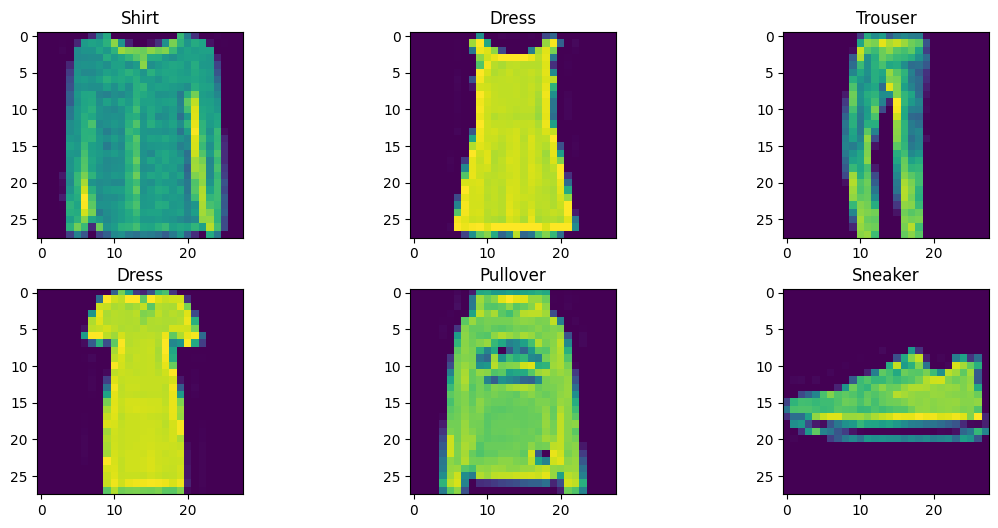

In [36]:
fig = plt.figure(figsize=(14,6))
fig.tight_layout(pad=5.0)

for i in range(1,7):
  random_num = torch.randint(1, len(train_data), (1,)).item()
  image, label = train_data[random_num]
  image.squeeze_()
  plt.subplot(2,3,i)
  plt.imshow(image)
  plt.title(train_data.classes[label])
  plt.subplots_adjust(wspace=0.1,
                    hspace=0.25)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?